In [26]:
import os 
#os.chdir('/home/clchupin1/IA_chupin/bench_all')

from utils_lib.utils import Utils

import math
import matplotlib.pyplot as plt
import numpy as np
import random
utils = Utils()
from itertools import cycle
cycol = cycle('bgrcmk')

from scipy.signal import savgol_filter


def get_path(policie_name,env_name,fe_k,fev_l,index=0):
    global util
    #util.all_feature_extractor[]
    return os.path.join(os.getcwd(), ("./result/log_json/" +
    policie_name+ "/" +
    env_name+"/"+
    utils.all_feature_extractor[fe_k]["name"] + "_v" +
    str(utils.all_feature_extractor[fe_k]["order"][fev_l]) + "_i" +
    str(index) +".json"
    ))
def get_plot_array(path_log):
    data = []
    time = []
    with open(path_log, 'r') as fd:
        lines = fd.read().split('\n')
        for l in lines:
            split_array=l.split(",")
            if len(split_array)==5:
                #print(len(split_array))
                time.append(float(split_array[0]))
                data.append(float(split_array[2]))

    data = np.array(data)
    time = np.array(time)
    return data,time
def plot_array(data,error,time,plot_target,label_plot,color,marker):
    if color ==None:
        color=next(cycol)
        while color=="k":
            color=next(cycol)
    if hasattr(data, "__len__"):#
        if not(len(data) < 40 or len(time) <40):
            ti_li = savgol_filter(time, 40, 1)
            error = savgol_filter(error, 40, 1)
            data_li = savgol_filter(data, 40, 1)
            #plt.legend()

            plot_target.plot(ti_li,data_li,label=label_plot,c=color, marker=marker,)
            plot_target.fill_between(ti_li,data_li-error,data_li+error,alpha=0.2,edgecolor=color, facecolor=color,)
            # plot_target.plot(ti_li,data_li-error)
            # plot_target.plot(ti_li,data_li+error)
def plot_one_file(plot_target,policy=None,env=None,fe_k=None,fe_v_k=None,label_plot="",color=None,marker=None,index=0):
    
    if not(hasattr(index, "__len__")):
        index=[index]

    policy = utils.all_policies[policy]
    env = utils.all_envs[env]
    data_final = []
    time_final = []
    for i in index:
        path_log = get_path(
            policie_name=policy["name"],
            env_name=env["name"],
            fe_k=fe_k,
            fev_l=fe_v_k,
            index=i)
        print(path_log)
        if os.path.exists(path_log):
            print("found")
            data,time = get_plot_array(path_log)
            data_final.append(data)
            time_final.append(time)
    data_mean = np.mean(data_final, axis=0)
    error_data = np.mean(np.abs(data_final-data_mean), axis=0)
    time_final = np.mean(time_final, axis=0)


    plot_array(data_mean,error_data,time_final,plot_target,label_plot,color,marker)
        



        
def plot_by_array(policy,env,fek,fev,index,label_plot=""):
    for i in policy:
        for j in env:
            for k in fek:
                for l in fev:  
                    if l < len(utils.all_feature_extractor[k]["order"]) :
                        if k==0:
                            plot_one_file(plt,i,j,k,l,label_plot=utils.all_feature_extractor[k]["name"]+"_"+str(utils.all_feature_extractor[k]["order"][l]),color="#000",index=index)
                        else:
                            plot_one_file(plt,i,j,k,l,label_plot=utils.all_feature_extractor[k]["name"]+"_"+str(utils.all_feature_extractor[k]["order"][l]),index=index)



In [27]:
#p2 e16 f0 v0
#p2 e16 f1 v2
#p2 e16 f167 v0


/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/none_v0_i11012.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/none_v0_i11013.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/none_v0_i11014.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/none_v0_i11015.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dff_v2_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dff_v2_i11012.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dff_v2_i11013.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dff_v2_i11014.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dff_v2_i11015.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarland

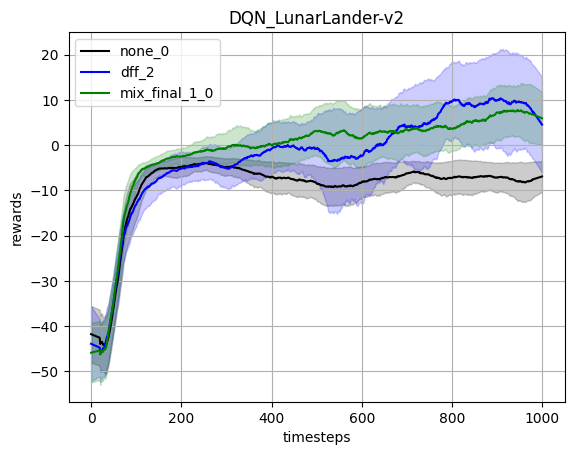

In [28]:
plt.figure(0)
env = 16
policy = 2
plt.title(utils.all_policies[policy]["name"]+"_"+utils.all_envs[env]["env"])
plt.xlabel("timesteps")
plt.ylabel("rewards")
plot_by_array([policy],[env],[0],[0],[11011,11012,11013,11014,11015])
plot_by_array([policy],[env],[1],[1],[11011,11012,11013,11014,11015])
plot_by_array([policy],[env],[167],[0],[11011,11012,11013,11014,11015])
plt.grid()
plt.legend()


In [29]:
#p3 e15 f0 v0
#p3 e15 f2 v1
#p3 e15 f168 v0

/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/none_v0_i11012.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/none_v0_i11013.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/none_v0_i11014.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/none_v0_i11015.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/mix_final_2_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/mix_final_2_v0_i11012.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/mix_final_2_v0_i11013.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/mix_final_2_v0_i11014.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/mix_final_2_v0_i11015.json
found


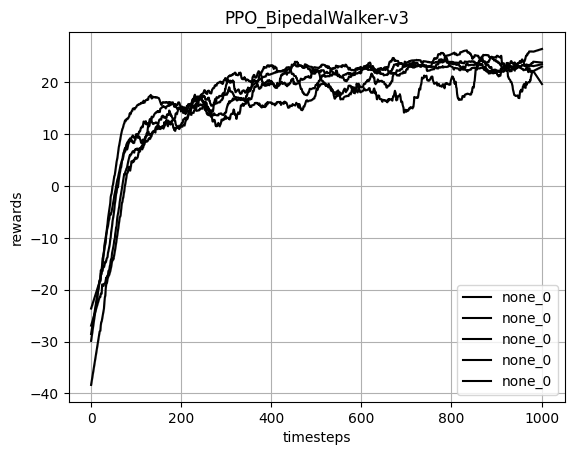

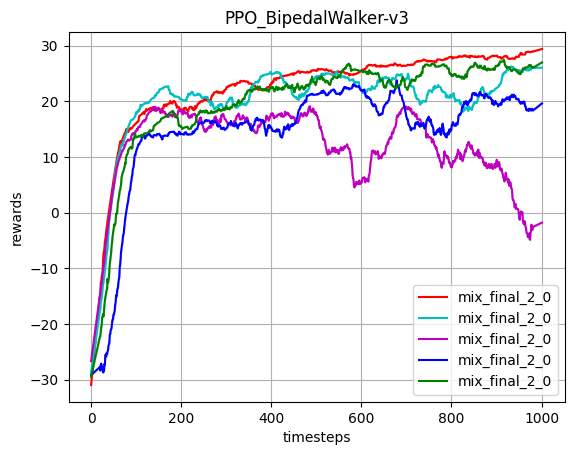

In [30]:
plt.figure(0)
env = 15
policy = 3
plt.title(utils.all_policies[policy]["name"]+"_"+utils.all_envs[env]["env"])
plt.xlabel("timesteps")
plt.ylabel("rewards")
for i in [11011,11012,11013,11014,11015]:
    plot_by_array([policy],[env],[0],[0],i)

plt.grid()
plt.legend()
plt.figure(1)
env = 15
policy = 3
plt.title(utils.all_policies[policy]["name"]+"_"+utils.all_envs[env]["env"])
plt.xlabel("timesteps")
plt.ylabel("rewards")
for i in [11011,11012,11013,11014,11015]:
    plot_by_array([policy],[env],[168],[0],i)

plt.grid()
plt.legend()

/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/none_v0_i11012.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/none_v0_i11013.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/none_v0_i11014.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/none_v0_i11015.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/mix_final_2_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/mix_final_2_v0_i11012.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/mix_final_2_v0_i11013.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/mix_final_2_v0_i11014.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/bipedalwalker/mix_final_2_v0_i11015.json
found


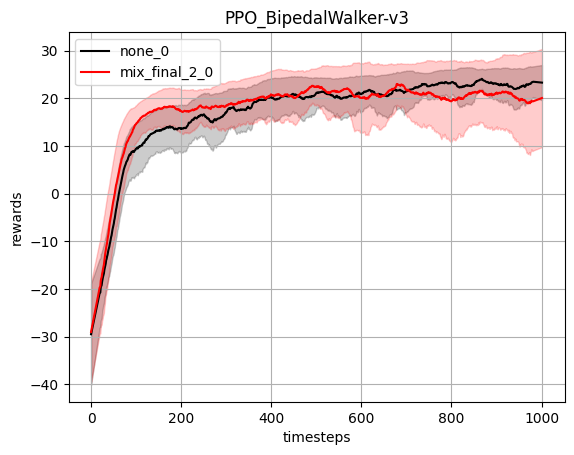

In [31]:
plt.figure(0)
env = 15
policy = 3
plt.title(utils.all_policies[policy]["name"]+"_"+utils.all_envs[env]["env"])
plt.xlabel("timesteps")
plt.ylabel("rewards")
plot_by_array([policy],[env],[0],[0],[11011,11012,11013,11014,11015])
plot_by_array([policy],[env],[168],[0],[11011,11012,11013,11014,11015])
# plot_by_array([policy],[env],[2],[1],[11011,11012,11013,11014,11015])
plt.grid()
plt.legend()

In [32]:
#p3 e8 f0 v0
#p3 e8 f2 v1
#p3 e8 f172 v3
#p3 e8 f168 v0

/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/none_v0_i11012.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/none_v0_i11013.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/none_v0_i11014.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/none_v0_i11015.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dflf_ll_v4_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dflf_ll_v4_i11012.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dflf_ll_v4_i11013.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dflf_ll_v4_i11014.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dflf_ll_v4_i11015.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/D_TLF_LinLayer_v8_i11

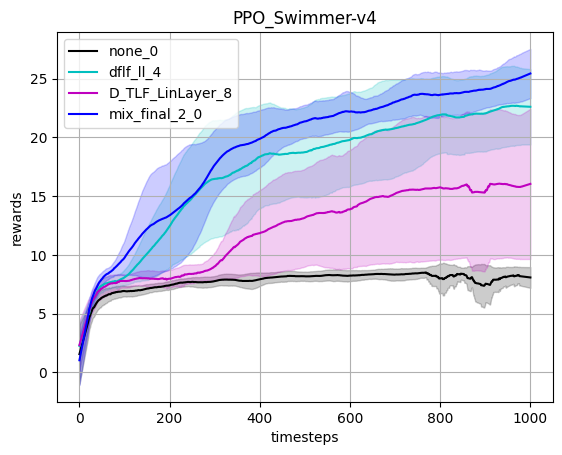

In [33]:
plt.figure(0)
env = 8
policy = 3
plt.title(utils.all_policies[policy]["name"]+"_"+utils.all_envs[env]["env"])
plt.xlabel("timesteps")
plt.ylabel("rewards")
plot_by_array([policy],[env],[0],[0],[11011,11012,11013,11014,11015])

plot_by_array([policy],[env],[2],[1],[11011,11012,11013,11014,11015])
plot_by_array([policy],[env],[172],[3],[11011,11012,11013,11014,11015])
plot_by_array([policy],[env],[168],[0],[11011,11012,11013,11014,11015])
plt.grid()
plt.legend()

/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dff_v1_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dff_v2_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dff_v3_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dff_v4_i11011.json
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dff_v6_i11011.json
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dflf_ll_v3_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dflf_ll_v4_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dflf_ll_v6_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dflf_ll_v8_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/swimmer/dflf_ll_v10_i11011.json
found
/home/a/Des

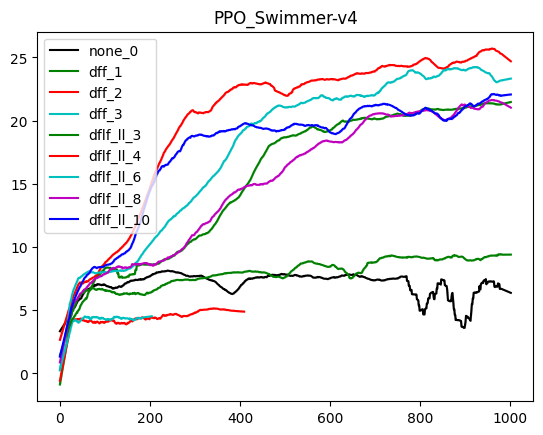

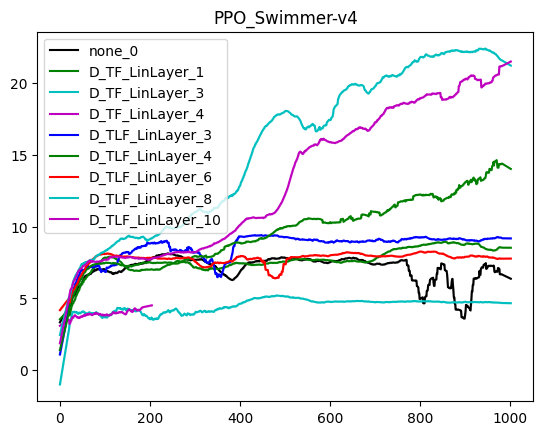

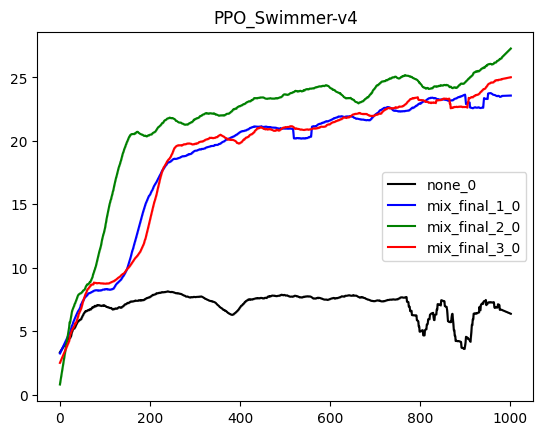

In [34]:

#Swimmer, 0 , 1 , 2 , 167,168,169, 171 , 172,
plt.figure(0)
plt.title("PPO_"+utils.all_envs[8]["env"])
plot_by_array([3],[8],[0,1,2],[0,1,2,3,4],[11011])
plt.legend()

plt.figure(1)
plt.title("PPO_"+utils.all_envs[8]["env"])
plot_by_array([3],[8],[0,171,172],[0,1,2,3,4],[11011])
plt.legend()

plt.figure(2)
plt.title("PPO_"+utils.all_envs[8]["env"])
plot_by_array([3],[8],[0,167,168,169],[0],[11011])
plt.legend()


/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dff_v1_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dff_v2_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dff_v3_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dff_v4_i11011.json
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dff_v6_i11011.json
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dflf_ll_v3_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dflf_ll_v4_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dflf_ll_v6_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/dflf_ll_v8_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarland

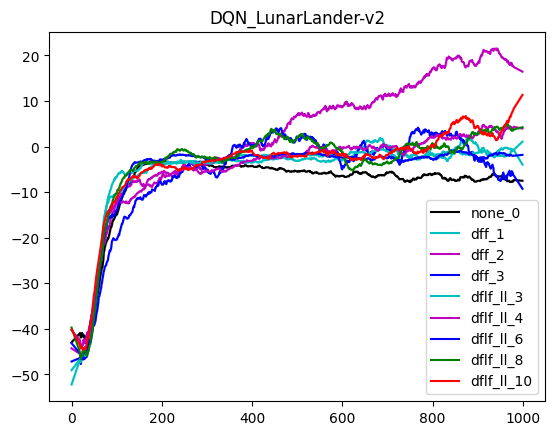

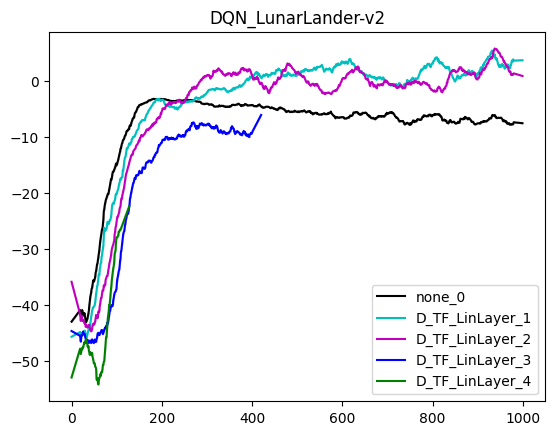

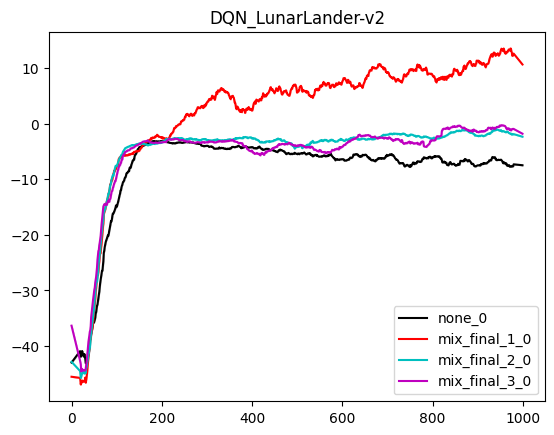

In [35]:
#LunarLunder, 0 , 1 , 2 , 167,168,169, 171 , 172,
plt.figure(0)
plt.title("DQN_"+utils.all_envs[16]["env"])
plot_by_array([2],[16],[0,1,2],[0,1,2,3,4],[11011])
plt.legend()

plt.figure(1)
plt.title("DQN_"+utils.all_envs[16]["env"])
plot_by_array([2],[16],[0,171,172],[0,1,2,3,4],[11011])
plt.legend()

plt.figure(2)
plt.title("DQN_"+utils.all_envs[16]["env"])
plot_by_array([2],[16],[0,167,168,169],[0],[11011])
plt.legend()